# Diabetes Classification with Logistic Regression 

Using the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database to predict whether subjects have diabetes or not with logistic regression

## Global Toolbox

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml 
seed=0

In [2]:
# ****** your code here ******
df = pd.read_csv("diabetes.csv")
df.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Your answer**: There are two classes 0 and 1. There are 8 features to predict the outcome. 

(2) Is the dataset class-balanced?

In [3]:
# ****** your code here ******
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Your answer**: This dataset is not class balanced. There are more outcomes for 0 than 1. 

(3) For this classification problem, what is the baseline accuracy and how would you interpret it? Round into 3 decimal place.

In [4]:
# ****** your code here ******
baseline_accuracy = 500 / (500 + 268)
print("Baseline Accuracy is:", round(baseline_accuracy, 3))

Baseline Accuracy is: 0.651


In [5]:

X = df.drop('Outcome', axis = 'columns').values


y = df.Outcome.values


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,  random_state = 0)


(1) Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**Your answer**: 
Yes it uses a penalty by default. It uses L2 regularization. 

    
(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients (parameters), relative to not applying a penalty during learning?

**Your answer**: 

With no penalty being applied, the coefficients are based purely on minimizing the residual sum of squares. 
Relative to no penality, the resulting coefficients are affected depending on the penalty chosen. L2 results in smaller coefficients due to them being more evenly distributed and avoiding large outliers. L1 forces certain coefficients to be 0, removing less important features from the model. Elastic combines both L1 and L2 resulting in sparse and smaller coefficients. 


(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**: No, by default the fit_intercept attribute is set to True. Meaning that the LogisticRegression model includes an intercept term. The model will automatially include the intercept term (column of 1s) in the feature matrix. 

Intercept (b): [-0.75122578]
Coefficients: [[0.00206725]]


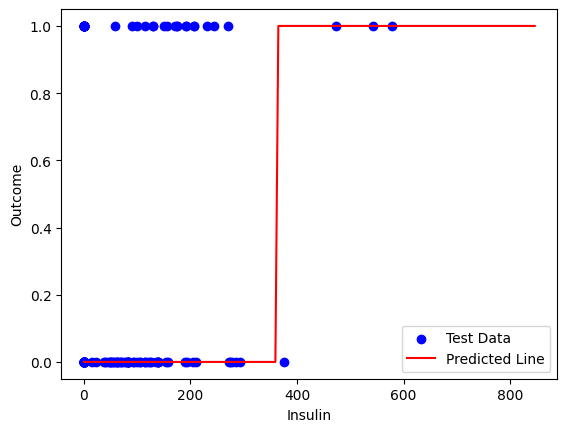

In [6]:

dfLR = LogisticRegression(penalty=None)


insulin = X[:, 4].reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(insulin, y, test_size=0.2, random_state=0)


dflr = dfLR.fit(X_train, y_train)
bInt = dflr.intercept_
coef = dflr.coef_

print("Intercept (b):", bInt)
print("Coefficients:", coef)


plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.xlabel('Insulin')
plt.ylabel('Outcome')

X_range = np.linspace(min(X_train), max(X_train), num=len(X_test)).reshape(-1, 1)
y_pred1 = dflr.predict(X_range)


sns.lineplot(x=X_range.flatten(), y=y_pred1, color='red', label='Predicted Line')
plt.legend()
plt.show()

In [7]:


def compute_performance (yhat, y, classes): 

# Ensure yhat and y have the same shape
    if yhat.shape != y.shape:
        raise ValueError("Shapes of yhat and y do not match")
        
    
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))  
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))  
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))  
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))  
   
    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
#Accuracy 
    trainacc = (tp +tn) / (tp + tn + fp + fn) 
#Recall 
    recall = tp / (tp + fn)
# precision 
    precision = tp / (tp + fp) 
# sensitivity 
    sensitivity = recall
# specificity 
    specificity = tn / (fp + tn) 
    
    print("Accuracy:", round(trainacc, 3), "Recall:", round(recall, 3),"Precision:", round(precision,3), 
          "Sensitivity:", round(sensitivity,3), "Specificity:", round(specificity,3))


compute_performance(y_pred1, ytest, dflr.classes_)


    

tp: 23 tn: 42 fp: 65 fn: 24
Accuracy: 0.422 Recall: 0.489 Precision: 0.261 Sensitivity: 0.489 Specificity: 0.393


## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dfLR = LogisticRegression(penalty=None, max_iter=1000)

dfLR.fit(X_train, y_train)

y_pred2 = dfLR.predict(X_test)

compute_performance(y_pred2, ytest, dflr.classes_)

tp: 29 tn: 98 fp: 9 fn: 18
Accuracy: 0.825 Recall: 0.617 Precision: 0.763 Sensitivity: 0.617 Specificity: 0.916


Does using more features help to improve the classification?

**Your answer** : Yes, the accuracy increases by almost 4%. The recall (tp rate) also increases measuring the true positive predictions made by the model. The precision of tp among all tp predictions increases as well. Sensitivity and specificity also both increase. 

In [9]:
threshold = 0.4

ytest_prob = dfLR.predict_proba(X_test)
y_pred3 = dfLR.classes_[(ytest_prob[:,1]>threshold).astype(int)]

compute_performance(y_pred3, ytest, dfLR.classes_)


tp: 34 tn: 88 fp: 19 fn: 13
Accuracy: 0.792 Recall: 0.723 Precision: 0.642 Sensitivity: 0.723 Specificity: 0.822


In [10]:

threshold = 0.6
y_pred4 = dfLR.classes_[(ytest_prob[:,1]>threshold).astype(int)]

compute_performance(y_pred4, ytest, dfLR.classes_)

tp: 26 tn: 100 fp: 7 fn: 21
Accuracy: 0.818 Recall: 0.553 Precision: 0.788 Sensitivity: 0.553 Specificity: 0.935


What do you think is a better threshold? 

**Your answer**: I believe a threshold of 0.6 is better in this dataset because the precision is higher. I think its more important to ensure that all the cases identified as positive are more likely to be correct, as this dataset deals with diabetes and is diagnosing patients. 

## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dfLR = LogisticRegression(penalty='l2', C = 0.01, max_iter=1000)

dfLR.fit(X_train, y_train)


y_pred5 = dfLR.predict(X_test)

compute_performance(y_pred5, ytest, dfLR.classes_)


tp: 28 tn: 97 fp: 10 fn: 19
Accuracy: 0.812 Recall: 0.596 Precision: 0.737 Sensitivity: 0.596 Specificity: 0.907


Does regularization help to improve the classification?

**Your answer** : Applying l2 regularization slightly improved the accuracy, precision and specificity, however, it decreased recall and sensitivity. I believe it does improve the classification since it prevents overfitting and leads to better generalization performance. 

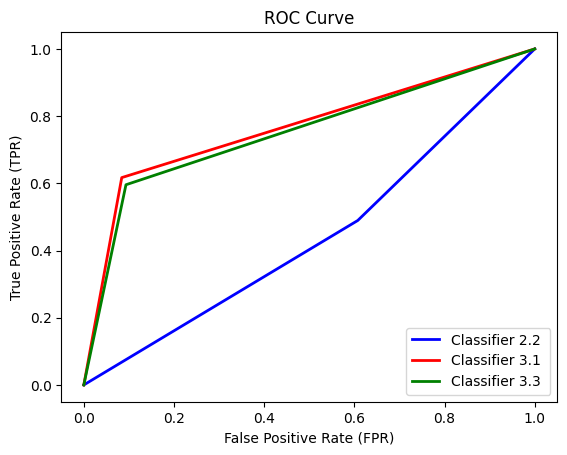

auc for classifier 2.2: 0.441
auc for classifier 3.1: 0.766
auc for classifier 3.3: 0.751


In [12]:

fpr1, tpr1, _ = roc_curve(ytest, y_pred1, pos_label=1)

fpr2, tpr2, _= roc_curve(ytest, y_pred2, pos_label=1)

fpr3, tpr3, _ = roc_curve(ytest, y_pred5, pos_label=1)

plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Classifier 2.2')
plt.plot(fpr2, tpr2, color='red', lw=2, label='Classifier 3.1 ')
plt.plot(fpr3, tpr3, color='green', lw=2, label='Classifier 3.3 ')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

print("auc for classifier 2.2:", round(roc_auc1, 3))
print("auc for classifier 3.1:",  round(roc_auc2, 3)) 
print("auc for classifier 3.3:",  round(roc_auc3, 3))

Which one is the best classifier?

**Your answer**: classifier from question 3.1 is the best classifier, it has the highest AUC. It has the greatest TPR against the FPR. 

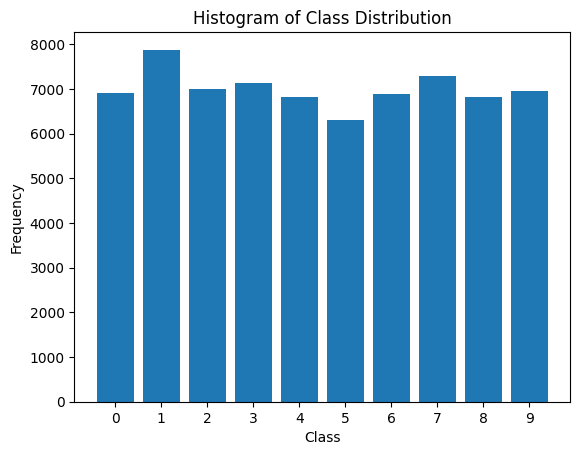

In [13]:
### your stuff

mnist = fetch_openml('mnist_784', version=1, parser='auto', as_frame=False)
X, y = mnist["data"], mnist["target"]

y = y.astype(np.uint8)

plt.hist(y, bins=range(11), align='left', rwidth=0.8)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Class Distribution')
plt.xticks(range(10))
plt.show()

**Your written answer**: The dataset is very balanced. Each number is represented fairly the same with a frequency of roughly 6050 - 8000. This suggests that there is sufficient amount of data for each number class to train a classifier effectively. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed)

sgd_clf = SGDClassifier(penalty='l2',max_iter=2000, tol=1e-3, random_state=seed, n_jobs=-1)
sgd_clf.fit(X_train, y_train)

#predicting y values
y_pred = sgd_clf.predict(X_test)


#calculating balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score:", balanced_accuracy)

Balanced Accuracy Score: 0.8664609338058759
